In [430]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

##please install ipympl with below code
## pip install ipympl

### Loading the Datasets

In [431]:
energy_consumption=pd.read_csv('Energy Consumption by sector.csv')
energy_prod=pd.read_csv('Primary Energy Production.csv')
energy_prices=pd.read_csv('Avg retail Electricity Prices.csv')
carbon=pd.read_csv('Co2 Emissions by source.csv')
renewable=pd.read_csv("Renewable Production and consumption by source.csv")

### Subsetting from 1990 to Present

In [432]:
energy_consumption = energy_consumption[energy_consumption['YYYYMM'] >= 199001].reset_index()
energy_prod = energy_prod[energy_prod['YYYYMM'] >= 199001].reset_index()
energy_prices = energy_prices[energy_prices['YYYYMM'] >= 199001].reset_index()
renewable = renewable[renewable['YYYYMM'] >= 199001].reset_index()
carbon = carbon[carbon['YYYYMM'] >= 199001].reset_index()

### PP Energy Production

In [433]:
energy_prod['Value'] = energy_prod['Value'].astype("float")

In [434]:
energy_prod["date_year"] = energy_prod['YYYYMM'].astype("str").apply(lambda x: x[:4])

In [435]:
## Aggregate Value column by source and date year combination
energy_prod_source_date = energy_prod.groupby(["Description","date_year"], as_index = False).agg({"Value":"sum"})

In [436]:
energy_prod_source_date.head(3)

,Description,date_year,Value
0,Biomass Energy Production,1990,5.470224
1,Biomass Energy Production,1991,5.563595
2,Biomass Energy Production,1992,5.863356


### PP Energy Consumption

In [437]:
energy_consumption['Value'] = energy_consumption['Value'].astype("float")

In [438]:
energy_consumption["date_year"] = energy_consumption['YYYYMM'].astype("str").apply(lambda x: x[:4])

In [439]:
## Aggregate Value column by source and date year combination
energy_consumption_source_date = energy_consumption.groupby(["Description","date_year"], as_index = False).agg({"Value":"sum"})
energy_consumption_source_date.head(3)

,Description,date_year,Value
0,Energy Consumption Balancing Item,1990,13.187
1,Energy Consumption Balancing Item,1991,1.190
2,Energy Consumption Balancing Item,1992,0.712


### PP Energy Prices

In [440]:
energy_prices['date_year'] = energy_prices['YYYYMM'].astype("str").apply(lambda x: x[:4])

In [441]:
## The command drops all rows where Value column has the value "Not Available" and "Not Applicable"
energy_prices.drop(energy_prices.index[energy_prices['Value']=="Not Available"], inplace= True)
energy_prices.drop(energy_prices.index[energy_prices['Value']=="Not Applicable"], inplace= True)

In [442]:
energy_prices['Value'] = energy_prices['Value'].astype("float")

In [443]:
## Mean Value column by source and date year combination
energy_prices_source_date=energy_prices.groupby(['Description','date_year'], as_index = False).agg({"Value":"mean"})
energy_prices_source_date.head(3)

,Description,date_year,Value
0,"Average Retail Price of Electricity, Commercial",1990,7.33
1,"Average Retail Price of Electricity, Commercial",1991,7.52
2,"Average Retail Price of Electricity, Commercial",1992,7.65


## PP Renewable Production and Consumption

In [444]:
renewable['Value'] = renewable['Value'].astype("float")

In [445]:
renewable['date_year'] = renewable['YYYYMM'].astype("str").apply(lambda x: x[:4])

In [446]:
## Aggregate Value column by source and date year combination
renewable_source_date=renewable.groupby(['Description','date_year'], as_index = False).agg({"Value": "sum"})
renewable_source_date.head(3)

,Description,date_year,Value
0,Biofuels Consumption,1990,221.732
1,Biofuels Consumption,1991,256.000
2,Biofuels Consumption,1992,290.012


### PP Carbon Emissions

In [447]:
## Carbon emissions
carbon['date_year'] = carbon['YYYYMM'].astype("str").apply(lambda x: x[:4])

In [448]:
## Aggregate Value column by source and date year combination
carbon_source_date=carbon.groupby(['Description','date_year'], as_index = False).agg({"Value": "sum"})
carbon_source_date.head(3)

,Description,date_year,Value
0,Aviation Gasoline CO2 Emissions,1990,6.218
1,Aviation Gasoline CO2 Emissions,1991,5.768
2,Aviation Gasoline CO2 Emissions,1992,5.677


## Visuals

### Looking at Energy Production

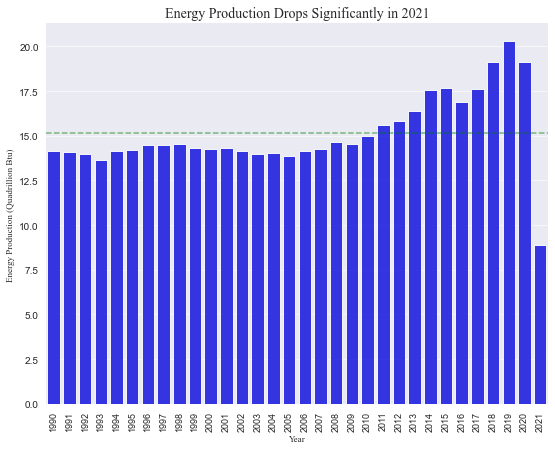

In [449]:
## We can delete some sources from this viz to declutter it
sns.set_style("darkgrid")
sns.set_context(rc = {"grid.linewidth": 0.6})
plt.figure(figsize = (9,7))
sns.barplot(x = energy_prod_source_date_cleaned['date_year'], y = energy_prod_source_date_cleaned['Value'],
            color = "blue", ci = None, alpha = 0.9)
plt.axhline(energy_prod_source_date_cleaned['Value'].mean(),
            color='green', ls = "--", alpha = 0.5)
plt.xticks(rotation = 90, size = 9)
plt.xlabel("Year", fontfamily = "Times New Roman", size = 9)
plt.ylabel("Energy Production (Quadrillion Btu) ", fontfamily = "Times New Roman", size = 9)
plt.title("Energy Production Drops Significantly in 2021", fontfamily = "Times New Roman", 
          size = 14)
sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

### Looking at total energy production

In [450]:
total_energy_prod=energy_prod_source_date[(energy_prod_source_date['Description'] == 'Total Fossil Fuels Production') | (energy_prod_source_date['Description'] == 'Total Primary Energy Production') | (energy_prod_source_date['Description'] == 'Total Renewable Energy Production')]

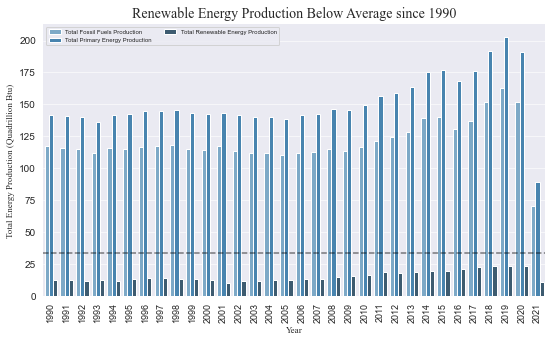

In [451]:
sns.set_style("darkgrid")
sns.set_context(rc = {"grid.linewidth": 0.6})
plt.figure(figsize = (9,5))
sns.barplot(x = total_energy_prod['date_year'], y = total_energy_prod['Value'], 
            ci = None, hue = total_energy_prod['Description'], linewidth = 1, palette="Blues_d")
plt.axhline(energy_prod_source_date['Value'].mean(),
            color='black', ls = "--", alpha = 0.5)
plt.xticks(rotation = 90, size = 9)
plt.xlabel("Year", fontfamily = "Times New Roman", size = 9)
plt.ylabel("Total Energy Production (Quadrillion Btu) ", fontfamily = "Times New Roman", size = 9)
plt.title("Renewable Energy Production Below Average since 1990", fontfamily = "Times New Roman", 
          size = 14)
sns.despine(left = True, right = True, top = True, bottom = False)
plt.legend(loc = 0, ncol = 2, fontsize = 6)
plt.show()

### Looking at Average Retail Electricity Prices

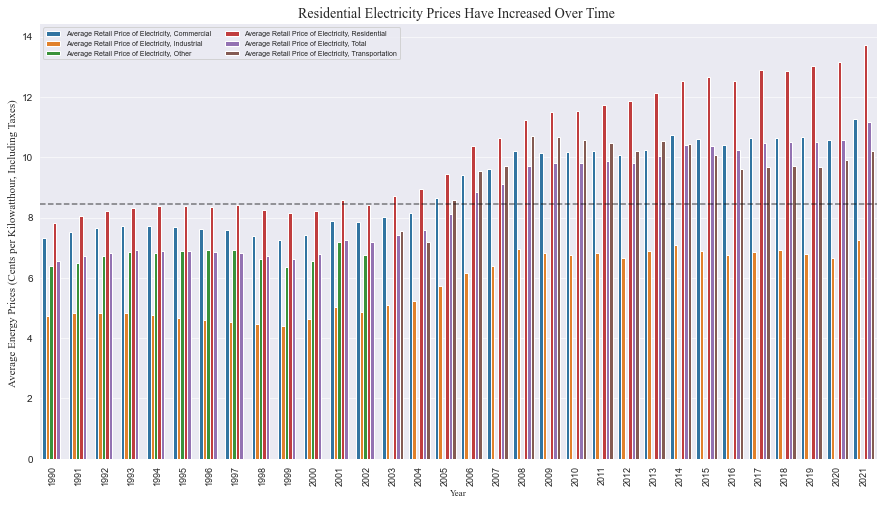

In [452]:
## remove average retail price of electricity, other (in green) since we dont have much data
sns.set_style("darkgrid")
sns.set_context(rc = {"grid.linewidth": 0.6})
plt.figure(figsize = (15,8))
sns.barplot(x = energy_prices_source_date['date_year'], y = energy_prices_source_date['Value'], 
            ci = None, hue = energy_prices_source_date['Description'])
plt.axhline(energy_prices_source_date['Value'].mean(),
            color='black', ls = "--", alpha = 0.5)
plt.xticks(rotation = 90, size = 9)
plt.xlabel("Year", fontfamily = "Times New Roman", size = 9)
plt.ylabel("Average Energy Prices (Cents per Kilowatthour, Including Taxes) ", fontfamily = "Times New Roman", size = 11)
plt.title("Residential Electricity Prices Have Increased Over Time ", fontfamily = "Times New Roman", 
          size = 14)
sns.despine(left = True, right = True, top = True, bottom = False)
plt.legend(loc = 0, ncol = 2, fontsize = 7)
plt.show()

### Looking at CO2 Emissions

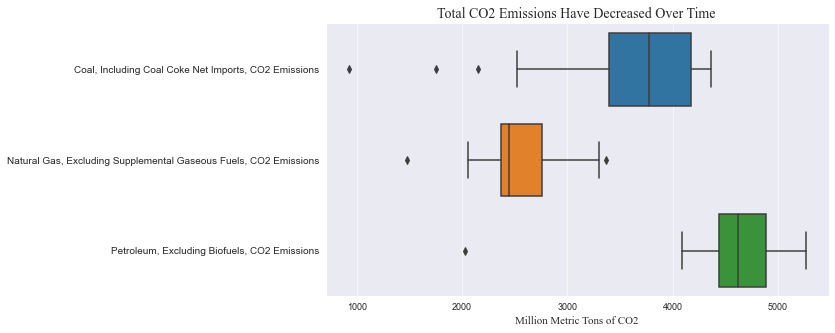

In [453]:
sns.set_style("darkgrid")
plt.figure(figsize = (9,5))
sns.boxplot(x = carbon_bar['Value'], y = carbon_bar['Description'])
#plt.axvline(carbon_bar['Value'].mean(), color='black', ls = "--", alpha = 0.5)
plt.xticks(size = 9)
plt.ylabel(None)
plt.xlabel("Million Metric Tons of CO2 ", fontfamily = "Times New Roman", size = 11)
plt.title("Total CO2 Emissions Have Decreased Over Time ", fontfamily = "times new roman", 
          size = 14)
sns.despine(left = True, right = True, top = True, bottom = False)
plt.show()

### Looking at Renewable Energy

In [454]:
carbon_bar=carbon_source_date[(carbon_source_date['Description'] == "Petroleum, Excluding Biofuels, CO2 Emissions") | (carbon_source_date['Description'] == "Coal, Including Coal Coke Net Imports, CO2 Emissions") | (carbon_source_date['Description'] == "Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions")]

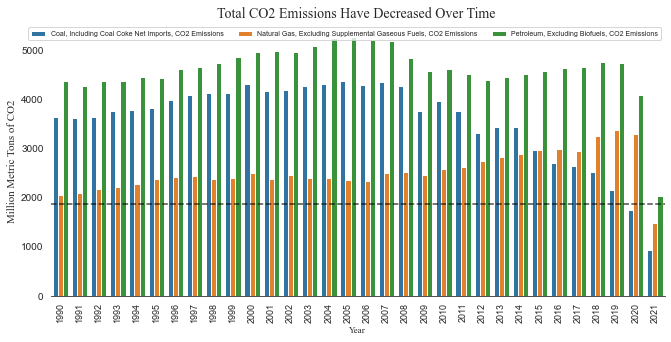

In [455]:
sns.set_style("white")
plt.figure(figsize = (11,5))
sns.barplot(x = carbon_bar['date_year'], y = carbon_bar['Value'], 
            hue = carbon_bar['Description'])
plt.axhline(carbon_source_date['Value'].mean(),
            color='black', ls = "--", alpha = 0.7)
plt.xticks(rotation = 90, size = 9)
plt.xlabel("Year", fontfamily = "Times New Roman", size = 9)
plt.ylabel("Million Metric Tons of CO2 ", fontfamily = "Times New Roman", size = 11)
plt.title("Total CO2 Emissions Have Decreased Over Time ", fontfamily = "times new roman", 
          size = 14)
sns.despine(left = True, right = True, top = True, bottom = False)
plt.legend(loc = 0, ncol = 3, fontsize = 7)
plt.show()

### Looking at Coal Production and Prices

In [456]:
coal_value=energy_prod_source_date[energy_prod_source_date['Description'] == "Coal Production"]['Value']

In [457]:
retail_price_coal=energy_prices_source_date[energy_prices_source_date['Description'] == "Average Retail Price of Electricity, Total"]['Value']

Text(0.5, 1.0, 'Coal Production Increases as the Prices Decreases')

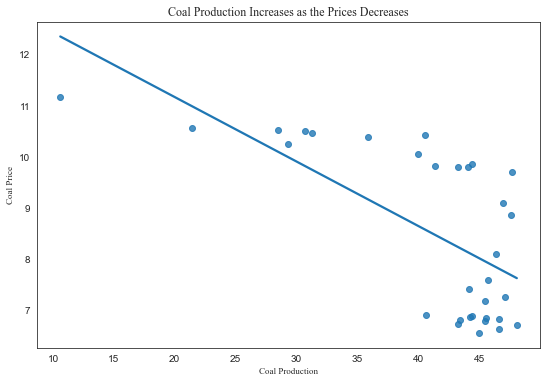

In [458]:
# Coal Production Increases
plt.figure(figsize = (9,6))
sns.regplot(x = coal_value, y = retail_price_coal, ci = None)
plt.xlabel("Coal Production", size  = 9, fontfamily = "times new roman")
plt.ylabel("Coal Price", size  = 9, fontfamily = "times new roman")
plt.title("Coal Production Increases as the Prices Decreases", fontfamily = "times new roman")

In [459]:
primary_residential=energy_consumption_source_date[energy_consumption_source_date['Description'] == "Primary Energy Consumed by the Residential Sector"]['Value']